In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [3]:
import pandas as pd
from chainconsumer import Chain, ChainConsumer, PlotConfig, Truth, ChainConfig

In [4]:
plt.style.use('../../notebooks/paper/corner.mplstyle')
double_textwidth = 7.0 #inches
single_textwidth = 3.5 #inches

In [5]:
fixed = [False, True, False, False, True, False]

fid_values = [2.0, 0.2]

fiducial = jsm_mcmc.Chain("../../mcmc/simple_power_law/s15//alpha_permutations/mock_1/chain.h5", fixed=fixed, Nburn=100, Nthin=15)

df_fid = pd.DataFrame(fiducial.clean, columns=["$\\alpha$", "$\\sigma$"])
df_fid["log_posterior"] = np.zeros(shape=df_fid.shape[0])

mock75 = jsm_mcmc.Chain("../../../data/big_files/mock_75/chain.h5", fixed=fixed, Nburn=100, Nthin=15)

df_75 = pd.DataFrame(mock75.clean, columns=["$\\alpha$", "$\\sigma$"])
df_75["log_posterior"] = np.zeros(shape=df_75.shape[0])

mock55 = jsm_mcmc.Chain("../../mcmc/fiducial/survey/mock_55/chain.h5", fixed=fixed, Nburn=10, Nthin=2)

df_55 = pd.DataFrame(mock55.clean, columns=["$\\alpha$", "$\\sigma$"])
df_55["log_posterior"] = np.zeros(shape=df_55.shape[0])

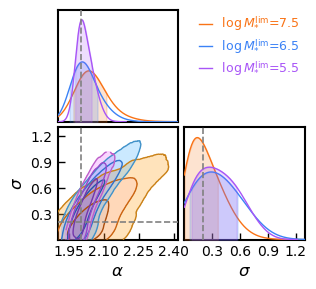

In [6]:
c = ChainConsumer()
c.set_override(ChainConfig(sigmas=[0, 1, 2, 3], shade_alpha=0.3))

c.add_chain(Chain(samples=df_75, name="$\log M_{*}^{\mathrm{lim}}$=7.5", show_contour_labels=False, kde=2.0, linewidth=1, color="orange", shade_gradient=0.6))
c.add_chain(Chain(samples=df_fid, name="$\log M_{*}^{\mathrm{lim}}$=6.5", show_contour_labels=False, kde=2.0, linewidth=1, color="blue", shade_gradient=0.6))
c.add_chain(Chain(samples=df_55, name="$\log M_{*}^{\mathrm{lim}}$=5.5", show_contour_labels=False, kde=2.0, linewidth=1, color="purple", shade_gradient=0.6))
c.add_truth(Truth(location={"$\\alpha$": 2.0, "$\\sigma$": 0.2}, line_width=1.2, color="grey"))

c.set_plot_config(PlotConfig(diagonal_tick_labels=False, label_font_size=12, extents={"$\\alpha$":[1.9, 2.42], "$\\sigma$":[0, 1.3]}, legend_kwargs={"fontsize":9}))
fig = c.plotter.plot(figsize=(single_textwidth, single_textwidth), filename="../../../paper_1/figures/feature_recovery/minmass.pdf")

In [7]:
fixed = [False, True, False, False, True, False]

fid_values = [2.0, 0.2]

fiducial = jsm_mcmc.Chain("../../mcmc/simple_power_law/s15//alpha_permutations/mock_1/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)
df_fid = pd.DataFrame(fiducial.clean, columns=["$\\alpha$", "$\\sigma$"])
df_fid["log_posterior"] = np.zeros(shape=df_fid.shape[0])

mock300 = jsm_mcmc.Chain("../../mcmc/fiducial/survey/mock_300/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)
df_300 = pd.DataFrame(mock300.clean, columns=["$\\alpha$", "$\\sigma$"])
df_300["log_posterior"] = np.zeros(shape=df_300.shape[0])

mock1000 = jsm_mcmc.Chain("../../../data/big_files/mock_1000/chain.h5", fixed=fixed, Nstack=500, Nburn=1000, Nthin=15)
df_1000 = pd.DataFrame(mock1000.clean, columns=["$\\alpha$", "$\\sigma$"])
df_1000["log_posterior"] = np.zeros(shape=df_1000.shape[0])


KeyboardInterrupt: 

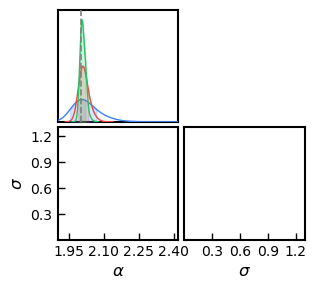

In [8]:
c = ChainConsumer()
c.set_override(ChainConfig(sigmas=[0, 1, 2, 3], shade_alpha=0.3))

c.add_chain(Chain(samples=df_fid, name="$N_{\mathrm{host}}=100$", show_contour_labels=False, kde=1.7, linewidth=1, color="blue", shade_gradient=0.6))
c.add_chain(Chain(samples=df_300, name="$N_{\mathrm{host}}=300$", show_contour_labels=False, kde=1.7, linewidth=1, color="red", shade_gradient=0.6))
c.add_chain(Chain(samples=df_1000, name="$N_{\mathrm{host}}=1000$", show_contour_labels=False, kde=1.7, linewidth=1, color="green", shade_gradient=0.6))
c.add_truth(Truth(location={"$\\alpha$": 2.0, "$\\sigma$": 0.2}, line_width=1.2, color="grey"))

c.set_plot_config(PlotConfig(diagonal_tick_labels=False, label_font_size=12, extents={"$\\alpha$":[1.9, 2.42], "$\\sigma$":[0, 1.3]}, legend_kwargs={"fontsize":9}))
fig = c.plotter.plot(figsize=(single_textwidth, single_textwidth), filename="../../../paper_1/figures/feature_recovery/Nhost.pdf")

In [20]:
fixed = [True, True, True, False, False, False]

mock1_1 = jsm_mcmc.Chain("../../../data/preliminary/updated_stats/new_stats/max/mock_1/chain.h5", fixed, Nburn=100, Nthin=20)

df_mock1 = pd.DataFrame(mock1_1.clean, columns=["$M_{*, 0}$", "$\\alpha$", "$\\sigma$"])
df_mock1["log_posterior"] = np.zeros(shape=df_mock1.shape[0])

mock1_2 = jsm_mcmc.Chain("../../../data/preliminary/updated_stats/new_stats/max/mock_2/chain.h5", fixed, Nburn=100, Nthin=20)

df_mock2 = pd.DataFrame(mock1_2.clean, columns=["$M_{*, 0}$", "$\\alpha$", "$\\sigma$"])
df_mock2["log_posterior"] = np.zeros(shape=df_mock2.shape[0])

mock1_3 = jsm_mcmc.Chain("../../../data/preliminary/updated_stats/new_stats/max/mock_5/chain.h5", fixed, Nburn=100, Nthin=20)

df_mock3 = pd.DataFrame(mock1_3.clean, columns=["$M_{*, 0}$", "$\\alpha$", "$\\sigma$"])
df_mock3["log_posterior"] = np.zeros(shape=df_mock3.shape[0])

mock1_fixed = jsm_mcmc.Chain("../../../data/preliminary/updated_stats/new_stats/for_loop/3x/mock_1/chain.h5", fixed, Nburn=100, Nthin=20)

df_mockf = pd.DataFrame(mock1_fixed.clean, columns=["$M_{*, 0}$", "$\\alpha$", "$\\sigma$"])
df_mockf["log_posterior"] = np.zeros(shape=df_mockf.shape[0])

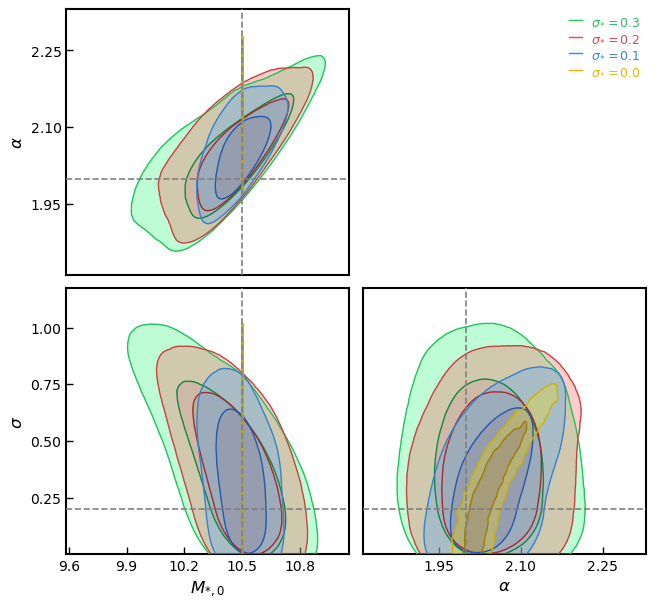

In [31]:
c = ChainConsumer()
c.set_override(ChainConfig(sigmas=[0, 1, 2], shade_alpha=0.3))
c.add_chain(Chain(samples=df_mock3, name="$\sigma_{*}=0.3$", show_contour_labels=False, linewidth=1,  kde=2.0, color="green", shade_gradient=0.6))
c.add_chain(Chain(samples=df_mock2, name="$\sigma_{*}=0.2$", show_contour_labels=False, linewidth=1,  kde=2.0, color="red", shade_gradient=0.6))
c.add_chain(Chain(samples=df_mock1, name="$\sigma_{*}=0.1$", show_contour_labels=False, linewidth=1,  kde=2.0, color="blue", shade_gradient=0.6))
c.add_chain(Chain(samples=df_mockf, name="$\sigma_{*}=0.0$", show_contour_labels=False, linewidth=1, color="yellow", shade_gradient=0.6, plotting_columns=["$\\alpha$", "$\\sigma$"]))
c.add_truth(Truth(location={"$M_{*, 0}$": 10.5, "$\\alpha$": 2.0, "$\\sigma$": 0.2}, line_width=1.2, color="grey"))

c.set_plot_config(PlotConfig(diagonal_tick_labels=False, label_font_size=12, legend_kwargs={"fontsize":9}, plot_hists=False))
fig = c.plotter.plot(figsize=(double_textwidth, double_textwidth))

In [32]:
import seaborn as sns

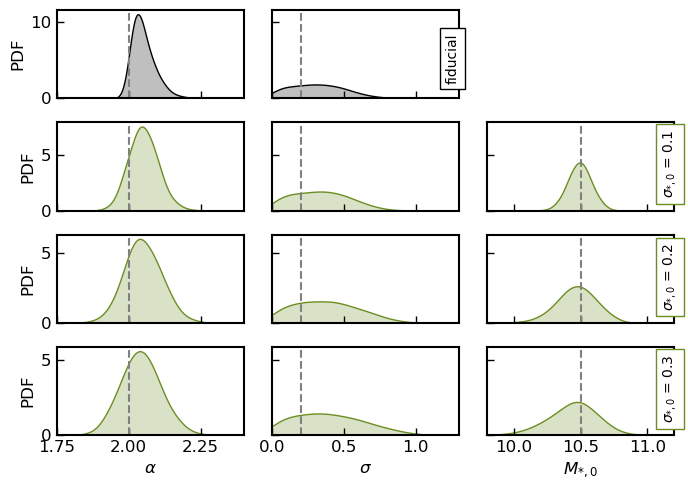

In [44]:
# Create a 4x3 subplot grid
fig, axes = plt.subplots(4, 3, sharex="col", sharey="row", figsize=(double_textwidth, 5))

# Loop through each subplot and plot KDE of the corresponding parameter
sns.kdeplot(mock1_fixed.clean[:, 1], ax=axes[0,0], bw_adjust=2, fill=True, color="k")
sns.kdeplot(mock1_fixed.clean[:, 2], ax=axes[0,1], bw_adjust=2, fill=True, color="k")
axes[0,2].axis("off")
axes[0,1].text(0.93, 0.2, "fiducial", rotation=90, transform=axes[0,1].transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor="k"))

axes[0,0].set_ylabel("PDF")

sns.kdeplot(mock1_1.clean[:, 1], ax=axes[1,0], bw_adjust=2, fill=True, color="olivedrab")
sns.kdeplot(mock1_1.clean[:, 2], ax=axes[1,1], bw_adjust=2, fill=True, color="olivedrab")
sns.kdeplot(mock1_1.clean[:, 0], ax=axes[1,2], bw_adjust=2, fill=True, color="olivedrab")
axes[1,2].text(0.93, 0.2, "$\\sigma_{*,0}$ = 0.1",  rotation=90, transform=axes[1,2].transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor="olivedrab"))
axes[1,0].set_ylabel("PDF")


sns.kdeplot(mock1_2.clean[:, 1], ax=axes[2,0], bw_adjust=2, fill=True, color="olivedrab")
sns.kdeplot(mock1_2.clean[:, 2], ax=axes[2,1], bw_adjust=2, fill=True, color="olivedrab")
sns.kdeplot(mock1_2.clean[:, 0], ax=axes[2,2], bw_adjust=2, fill=True, color="olivedrab")
axes[2,2].text(0.93, 0.2, "$\\sigma_{*,0}$ = 0.2",  rotation=90, transform=axes[2,2].transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor="olivedrab"))
axes[2,0].set_ylabel("PDF")

sns.kdeplot(mock1_3.clean[:, 1], ax=axes[3,0], bw_adjust=2, fill=True, color="olivedrab")
sns.kdeplot(mock1_3.clean[:, 2], ax=axes[3,1], bw_adjust=2, fill=True, color="olivedrab")
sns.kdeplot(mock1_3.clean[:, 0], ax=axes[3,2], bw_adjust=2, fill=True, color="olivedrab")
axes[3,2].text(0.93, 0.2, "$\\sigma_{*,0}$ = 0.3",  rotation=90, transform=axes[3,2].transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor="olivedrab"))
axes[3,0].set_ylabel("PDF")

axes[3,0].set_xlabel("$\\alpha$")
axes[3,1].set_xlabel("$\\sigma$")
axes[3,2].set_xlabel("$M_{*, 0}$")

axes[3,0].set_xlim(1.75, 2.4)
axes[3,1].set_xlim(0, 1.3)
axes[3,2].set_xlim(9.8, 11.2)


for index, ax in enumerate(axes[:,0]):
    ax.axvline(2.0, ls="--", color="grey",lw=1.5)
for index, ax in enumerate(axes[:,1]):
    ax.axvline(0.2, ls="--", color="grey",lw=1.5)
for index, ax in enumerate(axes[1:,2]):
    ax.axvline(10.5, ls="--", color="grey",lw=1.5)


plt.tight_layout()
plt.savefig("../../../paper_1/figures/feature_recovery/anchor_freedom.pdf", bbox_inches="tight")
plt.show()
